Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Eccentricity: 1.2435508060684273
Perimeter: 100.32590067386627


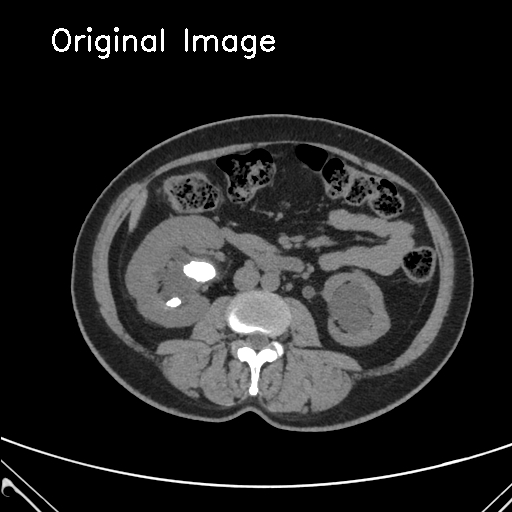

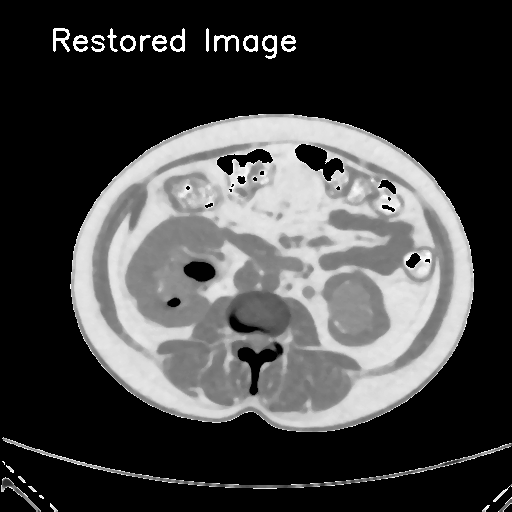

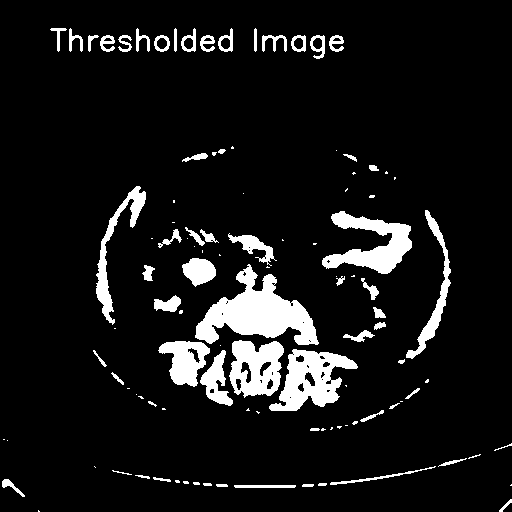

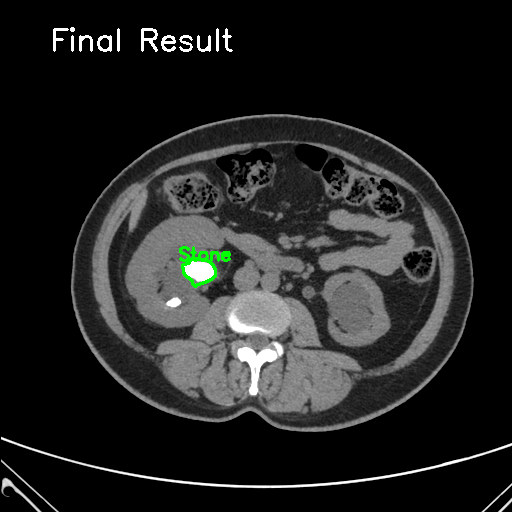

In [7]:
import cv2
import numpy as np
from skimage.filters import median
from skimage.morphology import disk
from google.colab.patches import cv2_imshow
from google.colab import drive

# Step 1: Image Acquisition
drive.mount('/content/drive')
img = cv2.imread('/content/drive/MyDrive/Final image/Stone/Stone18.jpg', cv2.IMREAD_GRAYSCALE)

# Step 2: Image Restoration (Noise Removal using Median Filter)
restored_img = median(img, disk(3))

# Step 3: Thresholding (Region-Based Segmentation)
_, thresholded_img = cv2.threshold(restored_img, 127, 255, cv2.THRESH_BINARY)

#Step 4: Represntation and Description (Feature Extraction) Find Contours in the Thresholded Image
contours, hierarchy = cv2.findContours(thresholded_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Check if any contours were found
if len(contours) == 0:
    print("No stone detected.")
    cv2.putText(contour_img, "No stone detected", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
else:
    # Step 6: Draw Contours and Label Detected Stones
    stone_detected = False
    for contour in contours:
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        if perimeter == 0: continue  # Avoid division by zero

        # Fit ellipse to the contour
        if area > 100:  # Ignore small contours
            (x, y), (MA, ma), angle = cv2.fitEllipse(contour)

            # Calculate eccentricity: e = sqrt(1 - (b^2 / a^2)) where b = minor axis, a = major axis
            eccentricity = (ma/MA) if ma != 0 else 0

            # Filtering circular or oval objects based on eccentricity
            if 0 < eccentricity < 2.5 and 100 < perimeter < 150:  # Allow oval shapes with low eccentricity
                # Draw contours
                print(f"Eccentricity: {eccentricity}")
                print(f"Perimeter: {perimeter}")
                cv2.drawContours(contour_img, [contour], -1, (0, 255, 0), 2)  # Green contour
                # Calculate center of the contour for labeling
                M = cv2.moments(contour)
                if M["m00"] != 0:  # Avoid division by zero
                    cX = int(M["m10"] / M["m00"])
                    cY = int(M["m01"] / M["m00"])

                    # Add text 'Stone' above the contour
                    cv2.putText(contour_img, "Stone", (cX - 20, cY - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

                stone_detected = True

    # If no stones are detected after contour checks
    if not stone_detected:
        print("No stone detected.")
        cv2.putText(contour_img, "No stone detected", (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Step 7: Add Text and Display Images
# Add text "Original Image" to the original image
cv2.putText(img, "Original Image", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
cv2_imshow(img)  # Original Image

# Add text "Restored Image" to the restored image
restored_img_color = cv2.cvtColor((restored_img * 255).astype(np.uint8), cv2.COLOR_GRAY2BGR)  # Convert back to uint8 for display
cv2.putText(restored_img_color, "Restored Image", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
cv2_imshow(restored_img_color)  # Restored Image

# Add text "Thresholded Image" to the thresholded image
thresholded_img_color = cv2.cvtColor(thresholded_img, cv2.COLOR_GRAY2BGR)  # Convert back to color for displaying text
cv2.putText(thresholded_img_color, "Thresholded Image", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
cv2_imshow(thresholded_img_color)  # Thresholded Image

# Add text "Final Result" to the contour image (if applicable)
cv2.putText(contour_img, "Final Result", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
cv2_imshow(contour_img)  # Final Result with Labels or No Stone Detected

# Wait for a key press and close windows
cv2.waitKey(0)
cv2.destroyAllWindows()